# Advanced Data Science - Capstone Project 

### Dataset

From NYC Open Data API https://dev.socrata.com/foundry/data.cityofnewyork.us/h9gi-nx95 have download "The Motor Vehicle Collisions" dataset which contains details on the crash event. As specified, The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage. 

In [1]:
# import some libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

### 1 - Upload data to Pandas Dataframe 

In [2]:
# read csv file in pandas 
dataset = pd.read_csv(".\capstone\Motor_Vehicle_Collisions_-_Crashes.csv")
dataset.head()

c:\users\luzoe\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/23/2018,14:00,MANHATTAN,10028,40.773975,-73.948555,"(40.773975, -73.948555)",YORK AVENUE,EAST 83 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4031414,Flat Bed,Sedan,NaN,NaN,NaN
1,12/12/2018,11:50,BROOKLYN,11210,40.634766,-73.935360,"(40.634766, -73.93536)",GLENWOOD ROAD,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4043296,Sedan,NaN,NaN,NaN,NaN
2,12/02/2018,0:30,BROOKLYN,11215,40.655834,-73.981230,"(40.655834, -73.98123)",10 AVENUE,19 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4036541,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,12/14/2018,12:00,MANHATTAN,10016,40.743782,-73.973520,"(40.743782, -73.97352)",1 AVENUE,EAST 34 STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4044707,Pick-up Truck,GOV'T,NaN,NaN,NaN
4,11/24/2018,22:30,MANHATTAN,10023,40.773600,-73.981580,"(40.7736, -73.98158)",COLUMBUS AVENUE,WEST 66 STREET,NaN,...,Unsafe Lane Changing,NaN,NaN,NaN,4035290,Taxi,Taxi,NaN,NaN,NaN


In [3]:
# check the type of data for each column 
dataset.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

<span style="color: red">Conclusion: as we can see data type for most part of columns in our dataset is correct; we have change 'CRASH DATE' and 'CRASH TIME' to data format</span> 

In [4]:
# transform 'CRASH DATE' to data format
dataset['CRASH DATE'] = pd.to_datetime(dataset["CRASH DATE"])

In [5]:
# transform 'CRASH TIME' to data format
dataset['CRASH TIME'] = pd.to_datetime(dataset["CRASH TIME"])

In [6]:
# In 'NUMBER OF PERSONS INJURED' column there are some NaN values, we solve that passing fillna() comand 
dataset['NUMBER OF PERSONS INJURED'] = dataset['NUMBER OF PERSONS INJURED'].fillna(0)

# change 'NUMBER OF PERSONS INJURED' from float to integer
dataset['NUMBER OF PERSONS INJURED'] = dataset['NUMBER OF PERSONS INJURED'].astype(int)

In [7]:
# In 'NUMBER OF PERSONS KILLED' column there are some NaN values, we solve that passing fillna() comand 
dataset['NUMBER OF PERSONS KILLED'] = dataset['NUMBER OF PERSONS KILLED'].fillna(0)

# change 'NUMBER OF PERSONS KILLED' from float to integer
dataset['NUMBER OF PERSONS KILLED'] = dataset['NUMBER OF PERSONS KILLED'].astype(int)

### 2 - Deal with missing data and drop unnecessary columns

In order to evaluate if make sense to keep these columns: 
 - "OFF STREET NAME", 
 - 'CONTRIBUTING FACTOR VEHICLE 2'
 - 'CONTRIBUTING FACTOR VEHICLE 3'
 - 'CONTRIBUTING FACTOR VEHICLE 4'
 - 'CONTRIBUTING FACTOR VEHICLE 5'
 - 'VEHICLE TYPE CODE 2'
 - 'VEHICLE TYPE CODE 3'
 - 'VEHICLE TYPE CODE 4'
 - 'VEHICLE TYPE CODE 5'

we check the number of missing values in each of them 
 

In [8]:
dataset['OFF STREET NAME'] = dataset['OFF STREET NAME'].fillna(0)

In [9]:
dataset.groupby(['OFF STREET NAME'])['OFF STREET NAME'].count().sort_values(ascending=False)

OFF STREET NAME
0                                           1485375
772       EDGEWATER ROAD                        402
110-00    ROCKAWAY BOULEVARD                    256
2800      VICTORY BOULEVARD                     231
2655      RICHMOND AVENUE                       165
                                             ...   
3919      GLENWOOD ROAD                           1
3919      MULVEY AVENUE                           1
3919      MURDOCK AVENUE                          1
392       1 STREET                                1
PL MORNINGSTAR ROAD AND RICHMOND AVE              1
Name: OFF STREET NAME, Length: 158172, dtype: int64

In [10]:
dataset.groupby(['CONTRIBUTING FACTOR VEHICLE 2'])['CONTRIBUTING FACTOR VEHICLE 2'].count().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1259231
Driver Inattention/Distraction      80147
Other Vehicular                     28491
Following Too Closely               15210
Failure to Yield Right-of-Way       14901
                                   ...   
Windshield Inadequate                   7
Listening/Using Headphones              7
Vehicle Vandalism                       7
1                                       5
Texting                                 3
Name: CONTRIBUTING FACTOR VEHICLE 2, Length: 61, dtype: int64

In [11]:
dataset['CONTRIBUTING FACTOR VEHICLE 3'] = dataset['CONTRIBUTING FACTOR VEHICLE 3'].fillna(0)
dataset.groupby(['CONTRIBUTING FACTOR VEHICLE 3'])['CONTRIBUTING FACTOR VEHICLE 3'].count().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 3
0                                                        1626721
Unspecified                                               107984
Other Vehicular                                             2153
Driver Inattention/Distraction                              1551
Following Too Closely                                       1474
Fatigued/Drowsy                                              853
Pavement Slippery                                            315
Reaction to Uninvolved Vehicle                               165
Driver Inexperience                                          152
Outside Car Distraction                                      150
Traffic Control Disregarded                                  142
Failure to Yield Right-of-Way                                127
Unsafe Speed                                                  97
Backing Unsafely                                              89
Alcohol Involvement                                         

In [12]:
dataset['CONTRIBUTING FACTOR VEHICLE 4'] = dataset['CONTRIBUTING FACTOR VEHICLE 4'].fillna(0)
dataset.groupby(['CONTRIBUTING FACTOR VEHICLE 4'])['CONTRIBUTING FACTOR VEHICLE 4'].count().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 4
0                                              1717948
Unspecified                                      23402
Other Vehicular                                    431
Following Too Closely                              279
Driver Inattention/Distraction                     202
Fatigued/Drowsy                                    170
Pavement Slippery                                   84
Reaction to Uninvolved Vehicle                      29
Traffic Control Disregarded                         21
Driver Inexperience                                 21
Outside Car Distraction                             21
Unsafe Speed                                        20
Fell Asleep                                         18
Obstruction/Debris                                  17
Failure to Yield Right-of-Way                       15
Alcohol Involvement                                 15
Other Electronic Device                              9
Backing Unsafely                   

In [13]:
dataset['CONTRIBUTING FACTOR VEHICLE 5'] = dataset['CONTRIBUTING FACTOR VEHICLE 5'].fillna(0)
dataset.groupby(['CONTRIBUTING FACTOR VEHICLE 5'])['CONTRIBUTING FACTOR VEHICLE 5'].count().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 5
0                                              1736304
Unspecified                                       6093
Other Vehicular                                    122
Following Too Closely                               67
Driver Inattention/Distraction                      45
Fatigued/Drowsy                                     41
Pavement Slippery                                   35
Reaction to Uninvolved Vehicle                       9
Alcohol Involvement                                  8
Driver Inexperience                                  8
Obstruction/Debris                                   7
Unsafe Speed                                         5
Failure to Yield Right-of-Way                        4
Fell Asleep                                          3
Traffic Control Disregarded                          3
Outside Car Distraction                              3
Other Electronic Device                              2
Drugs (illegal)                    

In [14]:
dataset['VEHICLE TYPE CODE 2'] = dataset['VEHICLE TYPE CODE 2'].fillna(0)
dataset.groupby(['VEHICLE TYPE CODE 2'])['VEHICLE TYPE CODE 2'].count().sort_values(ascending=False)

VEHICLE TYPE CODE 2
PASSENGER VEHICLE                      318607
Sedan                                  311683
0                                      284529
Station Wagon/Sport Utility Vehicle    258934
SPORT UTILITY / STATION WAGON          140204
                                        ...  
QMZ                                         1
QBE i                                       1
Pumper tru                                  1
Postal tru                                  1
yw                                          1
Name: VEHICLE TYPE CODE 2, Length: 1264, dtype: int64

In [15]:
dataset['VEHICLE TYPE CODE 3'] = dataset['VEHICLE TYPE CODE 3'].fillna(0)
dataset.groupby(['VEHICLE TYPE CODE 3'])['VEHICLE TYPE CODE 3'].count().sort_values(ascending=False)

VEHICLE TYPE CODE 3
0                                      1629811
Sedan                                    29724
PASSENGER VEHICLE                        27713
Station Wagon/Sport Utility Vehicle      23992
SPORT UTILITY / STATION WAGON            13358
                                        ...   
TRANSPORT                                    1
TRIALER                                      1
scoot                                        1
Trailer                                      1
yello                                        1
Name: VEHICLE TYPE CODE 3, Length: 178, dtype: int64

In [16]:
dataset['VEHICLE TYPE CODE 4'] = dataset['VEHICLE TYPE CODE 4'].fillna(0)
dataset.groupby(['VEHICLE TYPE CODE 4'])['VEHICLE TYPE CODE 4'].count().sort_values(ascending=False)

VEHICLE TYPE CODE 4
0                                      1718634
Sedan                                     6775
PASSENGER VEHICLE                         5969
Station Wagon/Sport Utility Vehicle       5347
SPORT UTILITY / STATION WAGON             2852
                                        ...   
MOPED                                        1
PICK-UP TR                                   1
PAS 5                                        1
trailor                                      1
Deliv                                        1
Name: VEHICLE TYPE CODE 4, Length: 75, dtype: int64

In [17]:
dataset['VEHICLE TYPE CODE 5'] = dataset['VEHICLE TYPE CODE 5'].fillna(0)
dataset.groupby(['VEHICLE TYPE CODE 5'])['VEHICLE TYPE CODE 5'].count().sort_values(ascending=False)

VEHICLE TYPE CODE 5
0                                      1736475
Sedan                                     1831
PASSENGER VEHICLE                         1487
Station Wagon/Sport Utility Vehicle       1431
SPORT UTILITY / STATION WAGON              802
4 dr sedan                                 123
Pick-up Truck                               98
UNKNOWN                                     94
Taxi                                        79
VAN                                         50
OTHER                                       49
TAXI                                        31
PICK-UP TRUCK                               31
Box Truck                                   18
Van                                         17
2 dr sedan                                  14
Motorcycle                                  13
LARGE COM VEH(6 OR MORE TIRES)              13
Bus                                         12
SMALL COM VEH(4 TIRES)                      10
Convertible                             

### <span style="color: red">Conclusion:
-	on column 'OFF STREET NAME' there are 1.485.375 null values consequently we drop this column 
-	on column 'CONTRIBUTING FACTOR VEHICLE 2' there are 1.259.231 unspecified values consequently we drop this column 
-	on column 'CONTRIBUTING FACTOR VEHICLE 3' there are 1.626.721 unspecified values consequently we drop this column 
-	on column 'CONTRIBUTING FACTOR VEHICLE 4' there are 1.717.948 unspecified values consequently we drop this column 
-	on column 'CONTRIBUTING FACTOR VEHICLE 5' there are 1.736.304 unspecified values consequently we drop this column 
-	on column 'VEHICLE TYPE CODE 2' there are 284.529 unspecified values, for the moment we decide to keep this column 
-	on column 'VEHICLE TYPE CODE 3'  there are 1.629.811 unspecified values consequently we drop this column 
-	on column 'VEHICLE TYPE CODE 4'  there are 1.718.634 unspecified values consequently we drop this column 
-	on column 'VEHICLE TYPE CODE 5'  there are 1.736.475 unspecified values consequently we drop this column 



In [18]:
# drop columns
dataset.drop(['OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3', \
              'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', \
              'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],  axis=1, inplace=True)  

Values in 'LOCATION' column are a tuple of latitude and longitude coordinates, as we have this values in 'LATITUDE' and 'LONGITUDE' columns we drop 'LOCATION' column

In [19]:
dataset.drop('LOCATION',  axis=1, inplace=True)

### 3 - Explanatory Data Analysis

Let's give a look at start and end date of our dataset

In [20]:
print("dataset start day:", dataset['CRASH DATE'].min())

print("dataset end day:", dataset['CRASH DATE'].max())

dataset start day: 2012-07-01 00:00:00
dataset end day: 2020-12-25 00:00:00


#### <span style="color: red">Step 1
For the whole dataset we look at which day of the week the incidents are higher, for this we create two dataframes and plot the data using barchart

In [21]:
test1 = dataset[dataset["NUMBER OF PERSONS INJURED"] !=0]

test1 = test1.groupby(dataset["CRASH DATE"].dt.weekday)\
["NUMBER OF PERSONS INJURED"].sum()

In [22]:
test2 = dataset[dataset["NUMBER OF PERSONS KILLED"] !=0]

test2 = test2.groupby(dataset["CRASH DATE"].dt.weekday)\
["NUMBER OF PERSONS KILLED"].sum()

Text(0, 0.5, '')

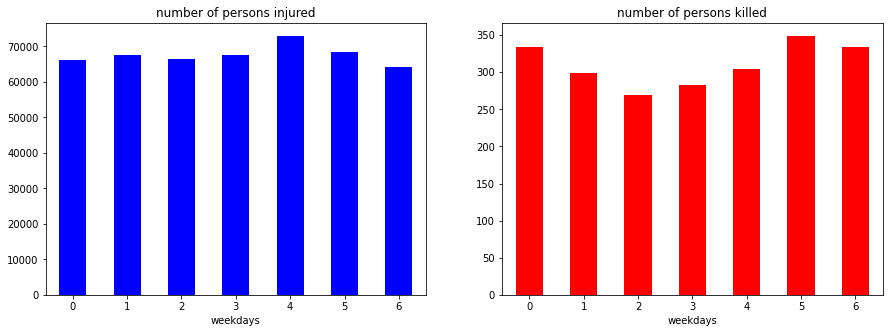

In [23]:
# check the number of persons injured and killed in each day of the week 

fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


test1.plot(kind='bar', figsize=(12,4), rot=0, color='b', ax = ax0)                       
ax0.set_title('number of persons injured')  
ax0.set_xlabel('weekdays') 
ax0.set_ylabel('')  


test2.plot(kind='bar', figsize=(15,5), rot=0, color='r', ax = ax1)                       
ax1.set_title('number of persons killed')  
ax1.set_xlabel('weekdays') 
ax1.set_ylabel('')  

As we can see on the graph, from Monday to Wednesday the number of persons injured is quite the same; Number of persons injured is higher on Friday and lower on Sunday. Number of persons killed is higher during weekend, with its highest value on Saturday. 

#### <span style="color: red">Step 2
For the whole dataset we look at which hour of the day the incidents are higher, for this we create two dataframes and plot the data using barchart

In [24]:
test3 = dataset[dataset["NUMBER OF PERSONS INJURED"] !=0]

test3 = test3.groupby(dataset["CRASH TIME"].dt.hour)\
["NUMBER OF PERSONS INJURED"].sum()

In [25]:
test4 = dataset[dataset["NUMBER OF PERSONS KILLED"] !=0]

test4 = test4.groupby(dataset["CRASH TIME"].dt.hour)\
["NUMBER OF PERSONS KILLED"].sum()

Text(0, 0.5, '')

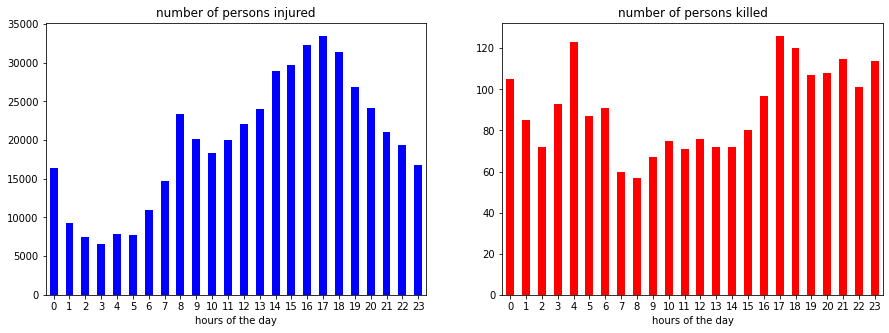

In [26]:
# check the number of persons injured and killed in each day of the week 

fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


test3.plot(kind='bar', figsize=(15,5), rot=0, color='b', ax = ax0)                       
ax0.set_title('number of persons injured')  
ax0.set_xlabel('hours of the day') 
ax0.set_ylabel('') 

test4.plot(kind='bar', figsize=(15,5), rot=0, color='r', ax = ax1)                       
ax1.set_title('number of persons killed')  
ax1.set_xlabel('hours of the day') 
ax1.set_ylabel('')  

From 6 am to 8 am the trend of collisions with injured people is upward trend. In next two hours, the trend become declining reaching its min value at 10 am. After that, the trend change direction and become increasing trend reaching it max value at 5 pm. After 5 pm. The trend change again direction and at 11 pm there is another min point.

Fatal accidents occurs more often at 4 am, 5 to 6 pm, 9 pm and 11pm. 



#### <span style="color: red">Step 3

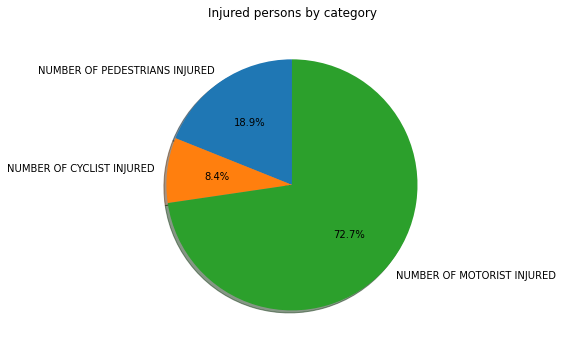

In [27]:
# create a subset of only injured persons and sort values in descending order 
df_injured = dataset[['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 
                      'NUMBER OF MOTORIST INJURED', 'COLLISION_ID']].sort_values('NUMBER OF PERSONS INJURED', ascending=False)

# set index on column 'COLLISION_ID'
df_injured.set_index('COLLISION_ID', inplace=True)

# select only collisions with injured persons
df_injured = df_injured[df_injured['NUMBER OF PERSONS INJURED'] !=0]

# 'NUMBER OF PERSONS INJURED' is the sum of the other 3 columns, so we drop 'NUMBER OF PERSONS INJURED' and create a pie chart
df_injured = df_injured.drop('NUMBER OF PERSONS INJURED', axis=1)

# Get sum of all rows as a new row in Dataframe
total = df_injured.sum()

# create pie chart
total.plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90,   shadow=True)
plt.title('Injured persons by category')
plt.axis('equal') 
plt.xlabel('')
plt.ylabel('')
plt.show()

#### <span style="color: red">Step 4

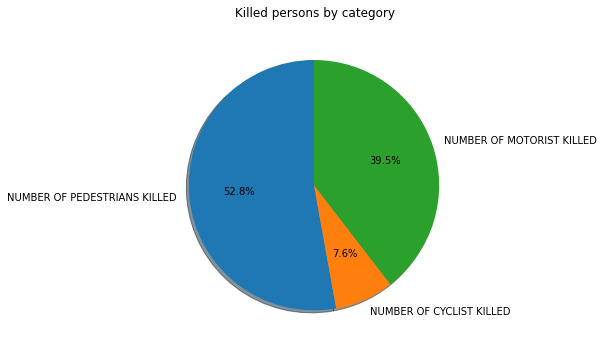

In [28]:
# create a subset of only killed persons and sort values in descending order 
df_killed = dataset[['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED',
                      'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']].sort_values('NUMBER OF PERSONS KILLED', ascending=False)

# set index on column 'COLLISION_ID'
df_killed.set_index('COLLISION_ID', inplace=True)

# select only collisions with killed persons
df_killed = df_killed[df_killed['NUMBER OF PERSONS KILLED'] !=0]

# 'NUMBER OF PERSONS KILLED' is the sum of the other 3 columns, so we drop 'NUMBER OF PERSONS KILLED' and create a pie chart
df_killed = df_killed.drop('NUMBER OF PERSONS KILLED', axis=1)

# Get sum of all rows as a new row in Dataframe
total = df_killed.sum()

# create pie chart
total.plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90,   shadow=True)
plt.title('Killed persons by category')
plt.axis('equal') 
plt.xlabel('')
plt.ylabel('')

plt.show()

Coment on step 4: xxxxxxxxxxxxxxxxxxxxxx

#### <span style="color: red">Step 5

In [29]:
test20 = dataset.groupby(dataset["CONTRIBUTING FACTOR VEHICLE 1"])\
["NUMBER OF PERSONS INJURED"].sum().sort_values(ascending=False)

In [30]:
# check total number of contributing factors
test20.shape

(61,)

In [31]:
# look at top ten list
test20.head(10)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       149022
Driver Inattention/Distraction     94706
Failure to Yield Right-of-Way      44230
Following Too Closely              29770
Traffic Control Disregarded        17519
Fatigued/Drowsy                    12161
Other Vehicular                    12148
Unsafe Speed                       10715
Alcohol Involvement                 8015
Turning Improperly                  7731
Name: NUMBER OF PERSONS INJURED, dtype: int32

In [32]:
# drop unspecified rows from test20 df
test20.drop(['Unspecified'],  axis=0, inplace=True)
test20_top_10 = test20.head(10)

In [33]:
# in test6 we repeat what we have done in test5
test21 = dataset.groupby(dataset["CONTRIBUTING FACTOR VEHICLE 1"])\
["NUMBER OF PERSONS KILLED"].sum().sort_values(ascending=False)

# drop unspecified rows from test6 df
test21.drop(['Unspecified'],  axis=0, inplace=True)

# create top_10 dataset 
test21_top_10 = test21.head(10)

Text(0, 0.5, '')

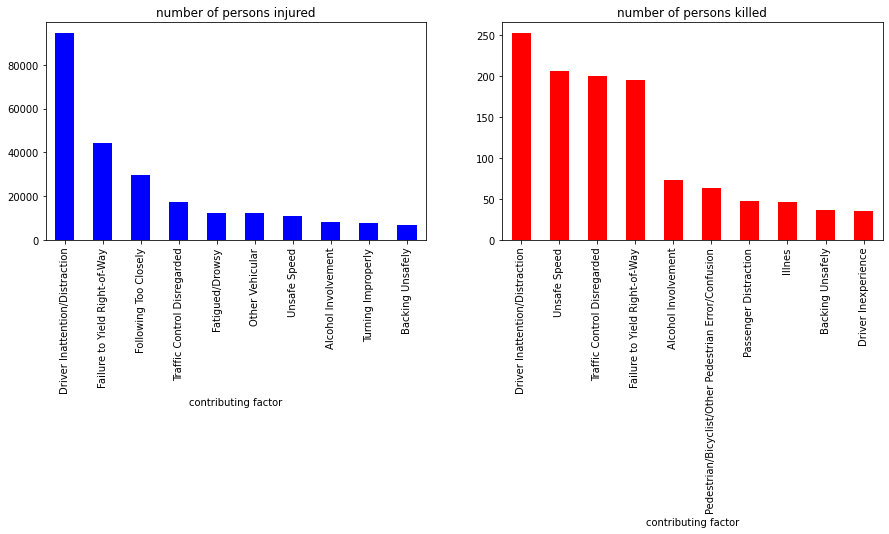

In [34]:
# check the number of persons injured and killed by top ten contributing factors 

fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

test20_top_10.plot(kind='bar', figsize=(15, 4 ), rot=90, color='b', ax = ax0)                       
ax0.set_title('number of persons injured')  
ax0.set_xlabel('contributing factor') 
ax0.set_ylabel('')  


test21_top_10.plot(kind='bar', figsize=(15,4), rot=90, color='r', ax = ax1)                       
ax1.set_title('number of persons killed')  
ax1.set_xlabel('contributing factor') 
ax1.set_ylabel('') 

Coments on step 5: xxxxxxxxxxxxxxxxxx

#### <span style="color: red">Step 6

In [35]:
# create a new dataframe with columns carsh date, person injured and person killed
df_10 = dataset[dataset['NUMBER OF PERSONS INJURED'] !=0]

df_10 = df_10.groupby(dataset["CRASH DATE"].dt.year)\
["NUMBER OF PERSONS INJURED"].sum()

In [36]:
# create a new dataframe with columns carsh date, person injured and person killed
df_11 = dataset[dataset['NUMBER OF PERSONS KILLED'] !=0]

df_11 = df_11.groupby(dataset["CRASH DATE"].dt.year)\
["NUMBER OF PERSONS KILLED"].sum()

Text(0, 0.5, '')

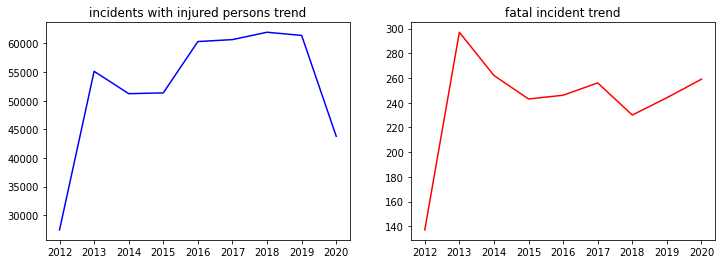

In [37]:
# plot the trend of injured and killed persons over years 

fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


df_10.plot(kind='line', figsize=(12,4), color='b', ax = ax0)                       
ax0.set_title('incidents with injured persons trend')  
ax0.set_xlabel('') 
ax0.set_ylabel('')  


df_11.plot(kind='line', figsize=(12,4), color='r', ax = ax1)                       
ax1.set_title('fatal incident trend')  
ax1.set_xlabel('') 
ax1.set_ylabel('')  

Coment on step 6: xxxxxxxxxxxxxxxxxxxxxx

We are going to look in more detail fatal incidents and put them on the map, let's first create a folium map of NYC

#### <span style="color: red">Step 7 - Create a Map of NYC and put incidents on map

In [38]:
import folium 

# create a folium map object
world_map = folium.Map()    

# add location and zoom start; decimal latitude and longitude coordinates for NYC are: 40.71427, -74.00597   
nyc_map = folium.Map(location=[40.71427, -74.00597], 
                     zoom_start=10) 

# nyc_map

#### <span style="color: red">Step 7.1: add on map pedestrians fatal incidents happened in 2020

In [39]:
# create a dataset of pedestrians killed keeping into memory latitude and longitude of collision 
pedestrian_killed = dataset[['COLLISION_ID', 'CRASH DATE','LATITUDE', 'LONGITUDE', 'NUMBER OF PEDESTRIANS KILLED']]

# fill NAN values with 0 using fillna() comand
pedestrian_killed = pedestrian_killed.fillna(0)

# select collisions with effective pedestrian killed
pedestrian_killed = pedestrian_killed[pedestrian_killed['NUMBER OF PEDESTRIANS KILLED']!=0]

# we will put on map only fatal incidents happens in 2020
pedestrian_killed = pedestrian_killed[pedestrian_killed['CRASH DATE']>= '1/1/2020']

# select longitute and latitude  vaues different from zero, otherwise we can not put incident on folium map  
pedestrian_killed = pedestrian_killed[pedestrian_killed['LATITUDE']!=0] 

# check dataframe dimensions 
pedestrian_killed.shape

(91, 5)

In [40]:
# now we are interested  to add indicents with killed pedestrians to the map we have created,  
# we start to create a feature group for data in dataset
incidents = folium.map.FeatureGroup()

# loop through dataset and add data to FeatureGoup
for lat, lng in zip(pedestrian_killed.LATITUDE, pedestrian_killed.LONGITUDE):
    incidents.add_child(folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6)) 
    
# add incidents to city_map   
nyc_map.add_child(incidents)

# add pop-up text over the circle 
latitudes = list(pedestrian_killed.LATITUDE)
longitudes = list(pedestrian_killed.LONGITUDE)
labels = list(pedestrian_killed.COLLISION_ID)  

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)
#nyc_map

In [41]:
# group markers in different clusters  

# import libraries
from folium import plugins

# create the map of the city 
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# create a mark cluster object for data in df and add it to city_map 
incidents = plugins.MarkerCluster().add_to(nyc_map)

#loop through data, add them to mark cluster
latitudes = list(pedestrian_killed.LATITUDE)
longitudes = list(pedestrian_killed.LONGITUDE)
labels = list(pedestrian_killed.COLLISION_ID)  
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(incidents)  

# show the map
nyc_map

#### <span style="color: red">Step 7.2: add on map cyclist fatal incidents happened in 2020

In [42]:
# create a dataset of cyclists killed keeping into memory latitude and longitude of collision 
cyclist_killed = dataset[['COLLISION_ID', 'CRASH DATE','LATITUDE', 'LONGITUDE', 'NUMBER OF CYCLIST KILLED']]

# fill NAN values with 0 using fillna() comand
cyclist_killed = cyclist_killed.fillna(0)

# select collisions with effective cyclist killed
cyclist_killed = cyclist_killed[cyclist_killed['NUMBER OF CYCLIST KILLED']!=0]

# we will put on map only fatal incidents happens in 2020
cyclist_killed = cyclist_killed[cyclist_killed['CRASH DATE']>= '1/1/2020']

# select longitute and latitude  vaues different from zero, otherwise we can not put incident on folium map  
cyclist_killed = cyclist_killed[cyclist_killed['LATITUDE']!=0] 

# check dataframe dimensions 
cyclist_killed.shape

(22, 5)

In [43]:
# now we are interested  to add indicents with killed cyclist to the map we have created,  
# we start to create a feature group for data in dataset
incidents = folium.map.FeatureGroup()

# loop through dataset and add data to FeatureGoup
for lat, lng in zip(cyclist_killed.LATITUDE, cyclist_killed.LONGITUDE):
    incidents.add_child(folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6)) 
    
# add incidents to city_map   
nyc_map.add_child(incidents)

# add pop-up text over the circle 
latitudes = list(cyclist_killed.LATITUDE)
longitudes = list(cyclist_killed.LONGITUDE)
labels = list(cyclist_killed.COLLISION_ID)  

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)
#nyc_map

In [44]:
# group markers in different clusters  

# create the map of the city 
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# create a mark cluster object for data in df and add it to city_map 
incidents = plugins.MarkerCluster().add_to(nyc_map)

#loop through data, add them to mark cluster
latitudes = list(cyclist_killed.LATITUDE)
longitudes = list(cyclist_killed.LONGITUDE)
labels = list(cyclist_killed.COLLISION_ID)  
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(incidents)  

# show the map
nyc_map

#### <span style="color: red">Step 7.3: add on map motorist fatal incidents happened in 2020

In [45]:
# create a dataset of cyclists killed keeping into memory latitude and longitude of collision 
motorist_killed = dataset[['COLLISION_ID', 'CRASH DATE','LATITUDE', 'LONGITUDE', 'NUMBER OF MOTORIST KILLED']]

# fill NAN values with 0 using fillna() comand
motorist_killed = motorist_killed.fillna(0)

# select collisions with effective cyclist killed
motorist_killed = motorist_killed[motorist_killed['NUMBER OF MOTORIST KILLED']!=0]

# we will put on map only fatal incidents happens in 2020
motorist_killed = motorist_killed[motorist_killed['CRASH DATE']>= '1/1/2020']

# select longitute and latitude  vaues different from zero, otherwise we can not put incident on folium map  
motorist_killed = motorist_killed[motorist_killed['LATITUDE']!=0] 

# check dataframe dimensions 
motorist_killed.shape

(102, 5)

In [46]:
# now we are interested  to add indicents with killed motorist to the map we have created,  
# we start to create a feature group for data in dataset
incidents = folium.map.FeatureGroup()

# loop through dataset and add data to FeatureGoup
for lat, lng in zip(motorist_killed.LATITUDE, motorist_killed.LONGITUDE):
    incidents.add_child(folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6)) 
    
# add incidents to city_map   
nyc_map.add_child(incidents)

# add pop-up text over the circle 
latitudes = list(motorist_killed.LATITUDE)
longitudes = list(motorist_killed.LONGITUDE)
labels = list(motorist_killed.COLLISION_ID)  

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)
#nyc_map

In [47]:
# group markers in different clusters  

# create the map of the city 
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# create a mark cluster object for data in df and add it to city_map 
incidents = plugins.MarkerCluster().add_to(nyc_map)

#loop through data, add them to mark cluster
latitudes = list(motorist_killed.LATITUDE)
longitudes = list(motorist_killed.LONGITUDE)
labels = list(motorist_killed.COLLISION_ID) 

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(incidents)  

# show the map
nyc_map

### 4 - Model selection, training and evaluation

For three dataset we have created we are going to use three different models to cluster the incidents:
- pedestrian_killed => KMeans algorithm (Machine Learning)
- cyclist_killed => DBSCAN (Machine Learning)
- motorist_killed => autoencoder (Deep Lerning) 

### <span style="color: red"> K-Means: Machine Learning algorithm  

 
K-Means is a good choice for our case because this algorithm work only unsupervised, and we do not have a target value in our dataframe. In K-Means, data are grouped based on similarity of observations to each other, observations within cluster are very similar and observations in different clusters are very dissimilar. It is exactly our goal, group incidents in clusters base on where the incident happened.

In K-Mean as first step we have to choose the number of clusters, it is a random choice. To calculate the error of the model we use SSE (sum of square errors), in case of KMEANS it measure the distance of an observation form its centroid. After running the model, we plot the SSE and find the most logical number of clusters; it is in correspondence of elbow point. 


In [48]:
# import libraries
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_pedestrians = pedestrian_killed.loc[:, ('LATITUDE', 'LONGITUDE', 'NUMBER OF PEDESTRIANS KILLED')]

# transform data from pandas to numpy; x must be numerical, is necessary to remove categorical columns 
x = df_pedestrians.values

# normalise x data
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

# create a K-Means object 
k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)

# fit the model with x_data
k_means.fit(x)

# grab labels of each point and save them 
labels = k_means.labels_

# assign labels to each row; add new column in dataframe 
df_pedestrians[['Labels']] = labels

# check centroid value
centroid = k_means.cluster_centers_

In [49]:
df_pedestrians.head()

,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS KILLED,Labels
47310,40.698265,-73.93399,1,0
47394,40.721750,-73.87546,1,3
47851,40.637096,-73.93465,1,0
47998,40.794132,-73.94281,1,4
50237,40.875480,-73.85758,1,1


In [50]:
# create the map of the city 
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# set number of clusters
kclusters = 6

# set color scheme for the clusters
xx = np.arange(kclusters)
ys = [i + xx + (i*xx)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, label in zip(df_pedestrians.LATITUDE, df_pedestrians.LONGITUDE, df_pedestrians.Labels):
       folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[label-1],
        fill=True,
        fill_color=rainbow[label-1],
        fill_opacity=0.7).add_to(nyc_map)
nyc_map

In [51]:

# create the map of the city 
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# create a mark cluster object for data in df and add it to city_map 
incidents = plugins.MarkerCluster().add_to(nyc_map)

#loop through data, add them to mark cluster
latitudes = list(df_pedestrians.LATITUDE)
longitudes = list(df_pedestrians.LONGITUDE)
labels = list(df_pedestrians.Labels) 

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(location=[lat, lng], icon=None, popup=label).add_to(incidents)  

# show the map
nyc_map

Use two different methods to evaluate KMeans model and determine k value:
- Elbow method
- Silhouette analysis

### Elbow Method and Silhouette analysis

To evluate K-Means we use Elbow Method and Silhouette score (analysis)

In K-Mean as first step we have to choose the number of clusters, it is a random choice. To calculate the error of the model we use SSE (sum of square errors), in case of KMEANS it measure the distance of an observation form its centroid. After running the model, we plot the SSE and find the most logical number of clusters, is in correspondence of elbow point.

Silhouette analysis study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighbouring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients near (+1) indicate that the sample is far away from the neighbouring clusters. A value of (0) indicates that the sample is on or very close to the decision boundary between two neighbouring clusters; a negative values indicate that those samples might have been assigned to the wrong cluster. 


For n_clusters = 2 The average silhouette_score is : 0.37608774283340574
For n_clusters = 3 The average silhouette_score is : 0.40370884572334226
For n_clusters = 4 The average silhouette_score is : 0.41418794298117756
For n_clusters = 5 The average silhouette_score is : 0.4262207607848127
For n_clusters = 6 The average silhouette_score is : 0.4538381840451914
For n_clusters = 7 The average silhouette_score is : 0.4596348710692436
For n_clusters = 8 The average silhouette_score is : 0.45874335024031715


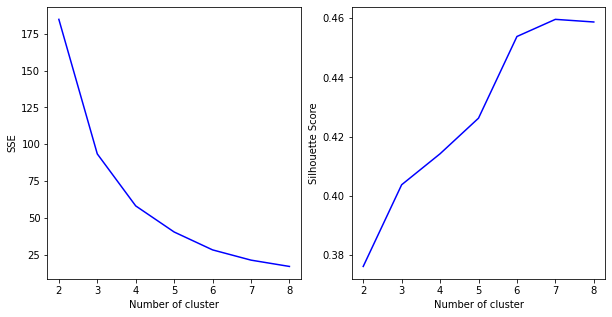

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8]
elbow = []
ss = []
for clusters in range_n_clusters:
    model = KMeans(n_clusters = clusters, random_state=12)  #iterating through cluster sizes
    labels = model.fit_predict(x)
    
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(x, labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", clusters,"The average silhouette_score is :", silhouette_avg)
    
    #Finding the average SSE"
    elbow.append(model.inertia_) # Inertia: Sum of distances of samples to their closest cluster center


fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

 <span style="color: red">Conclusion:
    
looking at the two graphs, our choice of 6 clusters was a good one. Our intuition was helped by looking incidents on NYC folium  map we have created. 

Hear we have prepare the code to go deeply on Silhouette analysis; we have not run it, as the information provided by the previous code analysis are enough for our scope. If you like to run it just switch the cell to code, the rest is ready. 

### <span style="color: red"> DBSCAN: Machine Learning algorithm

In this part, we will use advantages of DBSCAN, this algorithm locates region of high density and separates outlier. Indeed, DBSCAN can find out any arbitrary shaped cluster without getting, effected by noise. It can find even a cluster inside another cluster.   The algorithm works on the idea: if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.  The algorithm is based on two parameters: Radius (R) and Minimum points (M). R determines a specified radius that if it includes enough points within it, we call it a dense area. M determines the minimum number of data points we want in a neighbourhood to define a cluster.  

In [53]:
# import libraries
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df_cyclist = cyclist_killed.loc[:, ('LATITUDE', 'LONGITUDE', 'NUMBER OF CYCLIST KILLED')]

# transform data from pandas to numpy; x_dbscan must be numerical, is necessary to remove categorical columns 
x_dbscan = df_cyclist.values

# normalise x data
x_dbscan=preprocessing.StandardScaler().fit(x_dbscan).transform(x_dbscan.astype(float))

# create a DBSCAN object 
dbscan=DBSCAN(eps=0.5, min_samples=3)

# fit the model with x_data
dbscan.fit(x_dbscan)

# grab labels of each point and save them 
labels = dbscan.labels_

# assign labels to each row; add new column in dataframe 
df_cyclist[['Labels']] = labels


In [54]:
# create the map of the city  
nyc_map = folium.Map(location=[40.71427, -74.00597], zoom_start=10) 

# set number of clusters
n_clusters = len(set(labels)) #grab unique values of clusters from labels variable 

# set color scheme for the clusters
xx = np.arange(n_clusters)
ys = [i + xx + (i*xx)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, label in zip(df_cyclist.LATITUDE, df_cyclist.LONGITUDE, df_cyclist.Labels):
       folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[label-1],
        fill=True,
        fill_color=rainbow[label-1],
        fill_opacity=0.7).add_to(nyc_map)
nyc_map

In [55]:
from sklearn import metrics
metrics.silhouette_score(df_cyclist, df_cyclist['Labels'])

0.9173234565374102

#### DBSCAN Model evaluation

To evaluate the model we use Silhouette analysis and get a Silhouette score of 0.9, this is a good score meaning a high dense cluster 

#### K-Means algorithm in df_cyclist dataset
DBSCAN algorithm have created two clusters and there are many outliers. We run K-Means algorithm in the same dataset to check how many clusters K-Means will create. As evaluation metric we use SSE and Silhouette core.

For n_clusters = 2 The average silhouette_score is : 0.4476397661366239
For n_clusters = 3 The average silhouette_score is : 0.4665390837395075
For n_clusters = 4 The average silhouette_score is : 0.41105680745308
For n_clusters = 5 The average silhouette_score is : 0.422317195982683
For n_clusters = 6 The average silhouette_score is : 0.46977909482180924
For n_clusters = 7 The average silhouette_score is : 0.4560099751358917
For n_clusters = 8 The average silhouette_score is : 0.4209852560018993


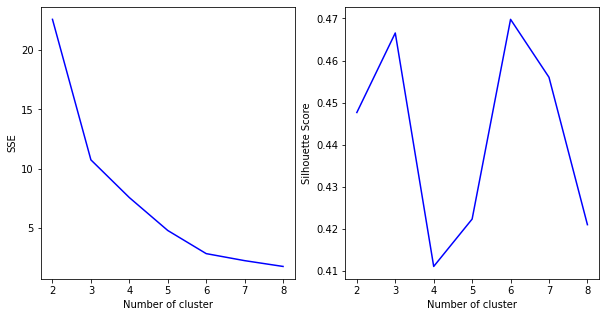

In [56]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
elbow = []
ss = []
for clusters in range_n_clusters:
    model = KMeans(n_clusters = clusters, random_state=12)  #iterating through cluster sizes
    labels = model.fit_predict(x_dbscan)
    
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(x_dbscan, labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", clusters,"The average silhouette_score is :", silhouette_avg)
    
    #Finding the average SSE"
    elbow.append(model.inertia_) # Inertia: Sum of distances of samples to their closest cluster center


fig = plt.figure(figsize=(10,5))

fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

#### K-Means model evaluation

With K-Means algorithm Silhouette Coefficient scores are in the range [0.41, 0.47], these are decent scores. Looking at SEE 6 can be a good number of cluster for cyclist_killed dataframe. 

### <span style="color: red"> Autoencoder: Deep Learning algorithm

In motorist_killed dataframe, we will first use auto encoder and then use K-means. As have been shown by different researches, running K-means on representation vectors learned by deep auto encoder tend to give better results compared to running K-means directly on the input vectors. 

Auto-encoders uses the same data for input and for output. As we know, auto-encoder is a kind of artificial neural network. It can learn feature representation in unsupervised manner. In auto encoder, there are two parts: encoder and decoder. Encoder, pass data in a bottleneck and the model is force to create a compress version of input data. Decoder, transform the compress version of input data to original input. 


In [57]:
motorist=motorist_killed[['LATITUDE', 'LONGITUDE', 'NUMBER OF MOTORIST KILLED']]
motorist.shape

(102, 3)

In [58]:
motorist_killed.head()

,COLLISION_ID,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF MOTORIST KILLED
46840,4375381,2020-12-10,40.614456,-73.915400,1
48070,4366939,2020-11-12,40.771347,-73.922850,1
49306,4373345,2020-12-04,40.687950,-73.825020,1
49348,4370706,2020-11-25,40.711643,-73.943920,1
50513,4369419,2020-11-20,40.719910,-73.809044,1


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

In [60]:
model=Sequential()

# we choose an input of 3, our data have 3 features; dense of 3 => there are 3 internal neurons 
input = Dense(3, input_shape = (3, ), activation='sigmoid')
model.add(input)

# we are building an auto encoder, so we add a bottleneck with one dimension and with "relu" activation function 
bottleneck = Dense(2, activation='sigmoid') # this is decoder
model.add(bottleneck)

# In auto encoder,  
model.add(Dense(3, activation='sigmoid')) # this is encoder

# compile the model
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['acc'])

# summarize the model
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
# fit the model we have created, we use the same data for model input and output
model.fit(motorist, motorist, epochs=10, verbose=1)

Epoch 1/10
4/4 [==============================] - 0s 5ms/step - loss: 2384.2256 - acc: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 2384.0669 - acc: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 2383.9084 - acc: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 2383.7500 - acc: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2383.5911 - acc: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 2383.4329 - acc: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 2383.2742 - acc: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 987us/step - loss: 2383.1157 - acc: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 763us/step - loss: 2382.9573 - acc: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 81us/step - loss: 2382.7988 - acc: 1.0000


In [62]:
# make prediction using auto encoder model created 

predicted = model.predict(motorist)

loss, accuracy = model.evaluate(predicted, predicted, verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Loss: %f' % (loss*100))

Accuracy: 100.000000
Loss: 0.039033


In [63]:
# create a K-Means object 
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 3)

# fit the model with x_data
k_means.fit(predicted)

# grab labels of each point and save them 
labels = k_means.labels_

# assign labels to each row; add new column in dataframe 
motorist.loc[:,'Labels'] = labels

# check centroid value
centroid = k_means.cluster_centers_

c:\users\luzoe\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\luzoe\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### K-Means Model evaluation

In [64]:
labels

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [65]:
# Finding silhouette score
silhouette = silhouette_score(predicted, labels)
print("The average silhouette_score is :", silhouette)

The average silhouette_score is : 1.0


To evaluate the model we use Silhouette analysis and get a Silhouette score of 0.94, this is a good score meaning a high dense cluster

### 5 - Conclusion 

The aim of our work was to check where the fatal incidents have happened for year 2020, in NYC. 

After some initial data explanatory we have created three subset grouping incidents for pedestrians, cyclist and motorist. We select and train three different models and use them to cluster the data on the folium map we have created. The first model, K-Means, performance is good. It has created 6 clusters with a Silhouette score of 0.49, this is a decent score. The second model, DBSCAN is performing well. It has created 2 clusters with a Silhouette score of 0.917. The third model auto encoder & K-Means is performing well with a Silhouette score of 0.94   
